# PyTorch Workflow

Let's explore PyTorch end-to-end workflow.

In [92]:
import torch
print("PyTorch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())

PyTorch version: 1.13.1+cu117
CUDA available: True


In [93]:
# Workflow 
what_were_covering = {1: "data(prepare and load)",
                      2: "build model",
                      3: "fitting the model (training)",
                      4: "making predictions and evaluting model (inference)",
                      5: "putting it all together"}
what_were_covering

{1: 'data(prepare and load)',
 2: 'build model',
 3: 'fitting the model (training)',
 4: 'making predictions and evaluting model (inference)',
 5: 'putting it all together'}

In [94]:
import torch 
from torch import nn # nn contains all PyTorch's building blocks for neural networks 
import matplotlib.pyplot as plt 

# Check python version
print(f"PyTorch and cuda version: {torch.__version__}")
if torch.cuda.is_available():
    device = "cuda"
    print("Accelerator/Cuda/GPU is available!")
else:
    device = "cpu"
    print("Accelerator/Cuda/GPU is not available ;C, CPU mode")

PyTorch and cuda version: 1.13.1+cu117
Accelerator/Cuda/GPU is available!


## 1. Data (preparing and loading)

* Excel 
* Images
* Videos
* Audio 
* DNA 
* Text
* (...)

Machine learning: 
1. Get data into numerical representation
2. Build model to learn patterns in that numerical representation 

In [95]:
# Create artificial data with know pattern (linnear function)
weight = 0.7 
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1) # Adds extra dimension, sol we have (1,10)
y = weight * X + bias

X[:10], y[:10] # That notation is to show the first 10 elements

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [96]:
len(X), len(y) # 50 elements 

(50, 50)

In [97]:
# Spliting data into train, test, validation (basic machine learning step)
# Guide:
# Train ->  60-80%
# Validation -> 10-20%
# Test -> 10-20%

# Note: Train + validation = design split/partition

train_split = int(0.8 * len(X)) # 50 * 0.8
X_train, y_train  = X[:train_split], y[:train_split] # Taking first 50*0.8 data
X_test, y_test = X[train_split:], y[train_split:] # Taking the rest 

len(X_train), len(X_test), len(y_train), len(y_test)
# 40 data to train, 10 to test

(40, 10, 40, 10)

In [98]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    '''
    Plots training data, test data and compares predictions
    '''

    # Plot training data in blue 
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c="b", s=8, label="Training data")
    
    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=8 ,label="Test data")
    
    # ¿Predictions? -> Plot if exists
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r", s=8, label="Predictions")
    
    
    # Show the legend
    plt.legend(prop={"size":14})

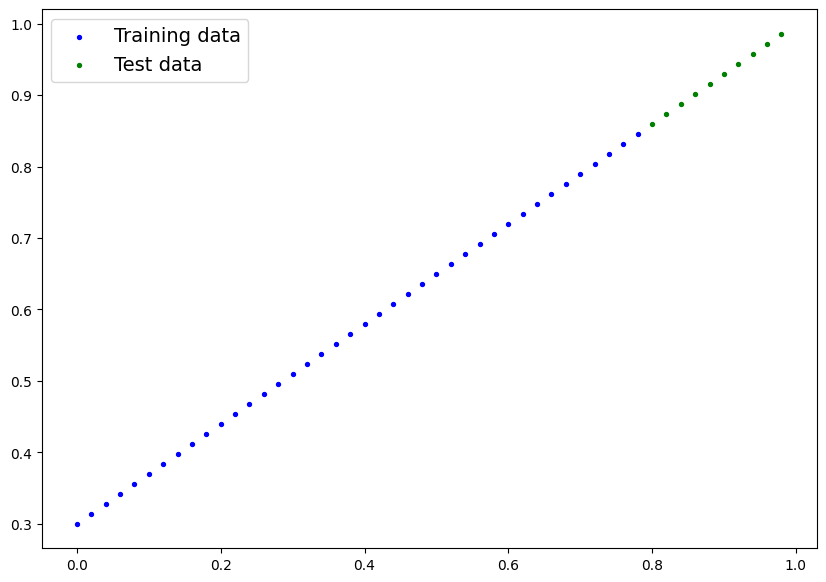

In [99]:
plot_predictions()

## 2. Bulding first PyTorch model



In [100]:
# Create a linear regresion model class

class LinearRegressionModel(torch.nn.Module): ## Almost everything in PyTorch inherist from nn.Module
    # Class init 
    def __init__(self):
        super().__init__()
    
        ############### Initialize parameters ###############
        
            # We use the sublcass nn.Parameter to create the, obmf course, parameters
        self.weights = nn.Parameter(torch.randn(1,
                                                requires_grad=True,
                                                dtype=torch.float)) # Creates attribute "weights" 
            # Parameter for bias
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))    
         
    # Forward method to define the computation in the model at every call
    # Important: it's not inside "__init__" function
    def forward(self, x:torch.Tensor) -> torch.Tensor: # x is the input data
        return  self.weights * x + self.bias # Linear regresion

### PyTorch model building essentials
* torch.nn -> contains all of the buildings for computational graph (the neural network)
* torch.nn.Parameter -> what parameters should our model try and learn, often a PyTorch layer will set this
* torch.nn.Module -> The base class for all neural networks, if you subclass it, you should overwrite forward(). 
* torch.optim -> PyTorch optimizers (will help Gradient Descent)
* def forward() -> All nn.Module subclasses requires you to overwrite it.

### Checking the content of our PyTorch model.



In [101]:
# Create random seed 
torch.manual_seed(42)

# Create an instance of the model (subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check parameters 
list(model_0.parameters()) # Without list .parameters() give a generator

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [102]:
# List named parameters 
model_0.state_dict() # Diccionary of the model parameters 

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making predictions using `torch.inference_mode()`

When we pass data, it's going to run it through the `forward()` method.



In [103]:
# Simple way: y_preds = model_0(X_test)
with torch.inference_mode(): # -> Contex manager 
    y_preds = model_0(X_test)

y_preds
# Note: inference mode don`t track gradient (interesting for large dataset, faster computation/less computation)
# Note 2: inference mode it`s the prefered way 

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [104]:
# Another way (but with less advantages)
with torch.no_grad():
    y_preds2 = model_0(X_test)
y_preds2

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [105]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

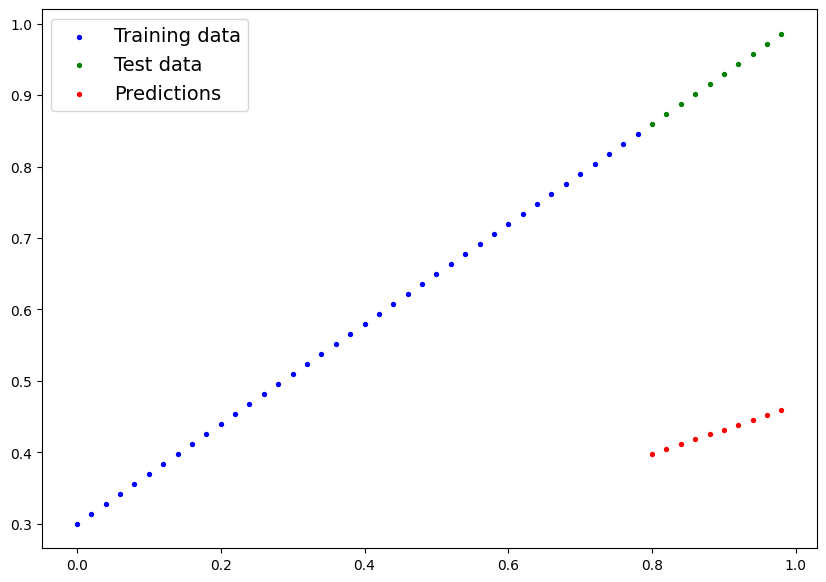

In [106]:
plot_predictions(predictions=y_preds)

## 3. Train model 

* Idea: start random parameters -> Poor representation -> Upgrade representation 
* How to measure how good is your model: cost/loss function (also called criteria) -> The lower the better

What we need in PyTorch: 
1. Training loop
2. Testing loop  


In [107]:
# Model parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [108]:
# Setup a loss function (MAE)
loss_fn = nn.L1Loss()
print(loss_fn)

# Setup a optimizer (stochastic gradient descent)
optimizer = torch.optim.SGD(params=model_0.parameters(), # Our model parameters 
                           lr=0.01)                      # Learning rate, very important 

L1Loss()


** Which loss and optimizer should I use? **
Usually:
* For regresion: `nn.L1Loss()` or `nn.MSE()` for loss and `torch.optim.SGD()` for optimizer will suffice.
* For classification: `nn.BCE()`(binary cross entropy) will work.

* **Note**: this is just a "initial setup", you will need to experiment with different ones.

### Building the training loop

0. Loop through the data
1. Forward pass (data moving through our model's  `forward()`) -> **Forward propagation**
2. Calculate loss (compare predictions to real values/labels)
3. Optimizer zero grad 
4. Loss backward (Move backwards through the network to calculate the gradients of our model with respect to the loss)
5. Optimizer step (use optimizer to adjust model parameters to improve loss )

In [82]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [115]:
torch.manual_seed(42)

# An epoch is one loop through the data...
epochs = 1000

# Rembember: 
# loss_fn = nn.L1Loss()
# optimizer = torch.optim.SGD()

# 0. Look through the data
for epoch in range(epochs):
    print(f"############ Epoch {epoch} ############")
    # Set the model to training mode 
    model_0.train() # Train mode in PyTorch sets all parameters that requires gradients to require gradient 
    
    # 1. Forward pass
    y_pred = model_0(X_train) # Linear model
    
    # 2. Calculate loss: loss_fn(prediction, real)
    loss = loss_fn(y_pred, y_train) # We are using MAE 
    print(f"Loss: {loss}")
    
    # 3. Optimizer 
    optimizer.zero_grad()
    
    # 4. Perform backpropagation on the loss with respect to the parameters of the model
    loss.backward()
    
    # 5. Step the optimizer (peform gradient descent)
    optimizer.step() # By default how the optimizer changes will acumulate through the loop so we have to zero them at (3.) 
    print(f"Updated parameters:\n\tWeights: {model_0.state_dict()['weights']}\n\tBias: {model_0.state_dict()['bias']}")
    


############ Epoch 0 ############
Loss: 0.008932482451200485
Updated parameters:
	Weights: tensor([0.6951])
	Bias: tensor([0.2993])
############ Epoch 1 ############
Loss: 0.0025885067880153656
Updated parameters:
	Weights: tensor([0.6990])
	Bias: tensor([0.3093])
############ Epoch 2 ############
Loss: 0.008932482451200485
Updated parameters:
	Weights: tensor([0.6951])
	Bias: tensor([0.2993])
############ Epoch 3 ############
Loss: 0.0025885067880153656
Updated parameters:
	Weights: tensor([0.6990])
	Bias: tensor([0.3093])
############ Epoch 4 ############
Loss: 0.008932482451200485
Updated parameters:
	Weights: tensor([0.6951])
	Bias: tensor([0.2993])
############ Epoch 5 ############
Loss: 0.0025885067880153656
Updated parameters:
	Weights: tensor([0.6990])
	Bias: tensor([0.3093])
############ Epoch 6 ############
Loss: 0.008932482451200485
Updated parameters:
	Weights: tensor([0.6951])
	Bias: tensor([0.2993])
############ Epoch 7 ############
Loss: 0.0025885067880153656
Updated par

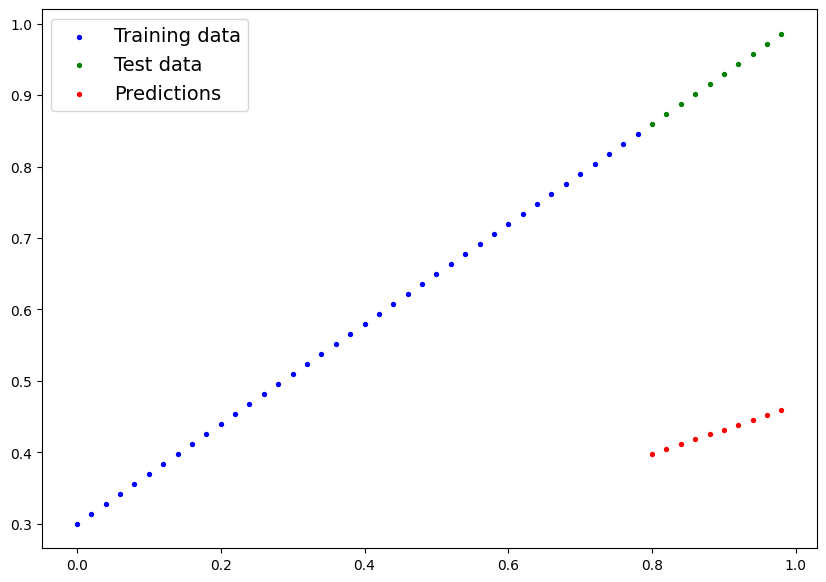

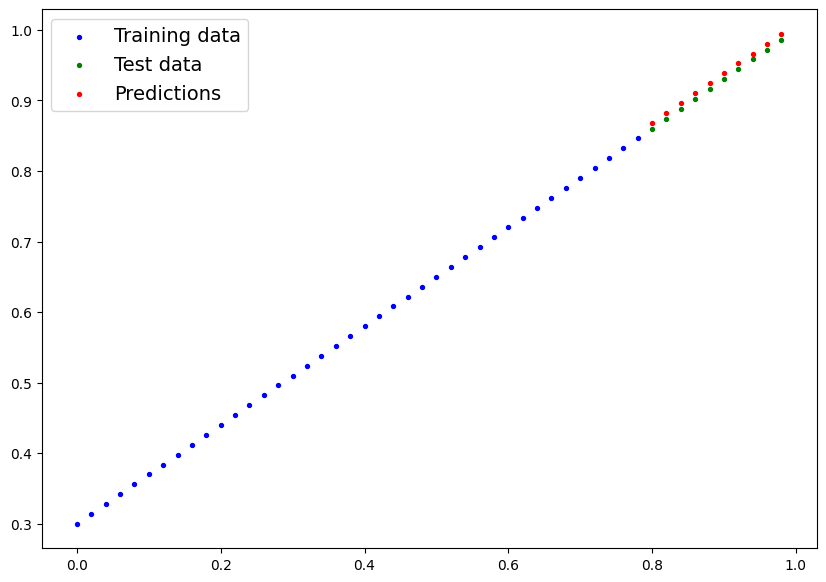

In [114]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)
    
plot_predictions(predictions=y_preds)
plot_predictions(predictions=y_preds_new)